<a href="https://colab.research.google.com/github/Odessit007/dementors/blob/main/PSD_FOR_ALL_BANDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy 
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import signal

Data Set Import 

In [5]:
local_path = "/content/drive/MyDrive/Zenoda Alpha Wave Dataset";
filenames = glob.glob(local_path + "/*.csv")#creating a list of files path having .csv extension in the directory
dfs = [pd.read_csv(filename,header = None) for filename in filenames];#reading all the dat files and storing in dfs
data_frame = pd.concat(dfs,ignore_index = False);


UNFILTERED PSD

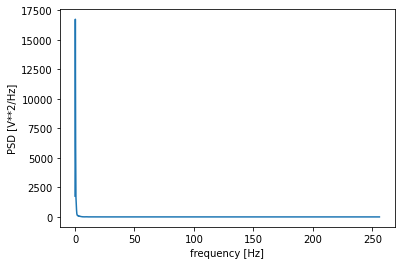

In [6]:
from scipy.fft import fft, fftfreq
channel_1 = dfs[0][1]
x =  channel_1[:65536];
fs = 512;
x = x.to_numpy();
#f, Pxx_den = scipy.signal.welch(x, fs)# welch method
f,P = scipy.signal.welch(x,fs = 512,nperseg = 2048,noverlap = 512,nfft = 2048);

#plt.semilogy(f, Pxx_den)
plt.plot(f,P)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


Low Pass Filtering

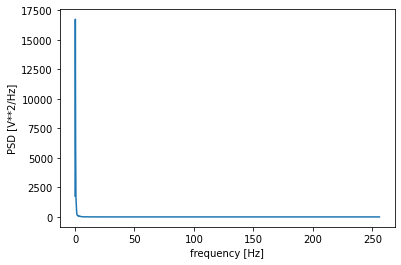

In [7]:
[b,a] = scipy.signal.butter(5,30/256,'low');
x_1 = scipy.signal.filtfilt(b,a,x);
f, Pxx_den = scipy.signal.welch(x_1,fs = 512,nperseg = 2048,noverlap = 512,nfft = 2048);

#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

High Pass Filtering

Text(0, 0.5, 'PSD [V**2/Hz]')

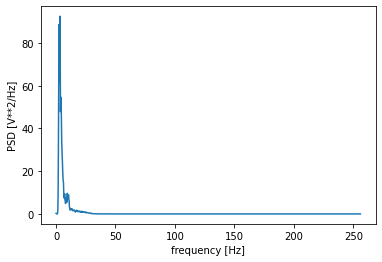

In [8]:
[b,a] = scipy.signal.butter(5,2/256,'high');
x_2 = scipy.signal.filtfilt(b,a,x_1);
f, Pxx_den = scipy.signal.welch(x_2,fs = 512,nperseg = 2048,noverlap = 512,nfft = 2048);

#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

Delta Band (freq 0.5 - 4 Hz)

143.35339890069957


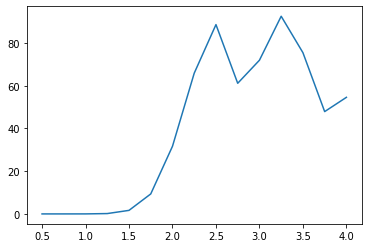

In [32]:
delta = f[2:17];#delta frequency range 0.5 - 4 Hz
delta_power = Pxx_den[2:17];#power in delta band 
plt.plot(delta,delta_power)
delta_power_value = np.trapz(delta_power,delta);#calculating power by AUC
print(delta_power_value)

83.79607342790828


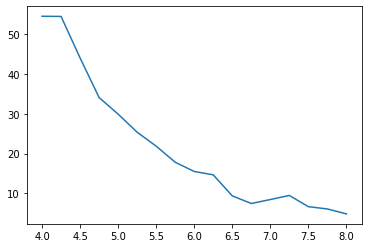

In [33]:
theta = f[16:33];#theta frequency range 4 - 8 Hz
theta_power = Pxx_den[16:33];#power theta band 
plt.plot(theta,theta_power);
theta_power_value = np.trapz(theta_power,theta);#calculating power by AUC
print(theta_power_value)

24.936458417382088


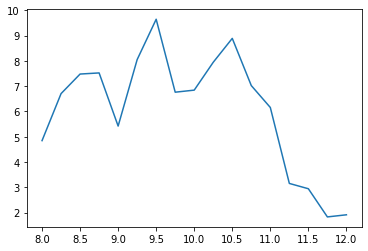

In [34]:
alpha = f[32:49];#theta frequency range 4 - 8 Hz
alpha_power = Pxx_den[32:49];#power theta band 
plt.plot(alpha,alpha_power);
alpha_power_value = np.trapz(alpha_power,alpha);#calculating power by AUC
print(alpha_power_value)

19.67277237509798


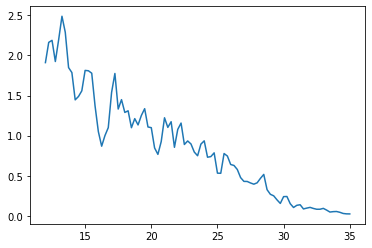

In [35]:
beta = f[48:141];#beta frequency range
beta_power = Pxx_den[48:141];#beta band power
plt.plot(beta,beta_power)
beta_power_value = np.trapz(beta_power,beta);#calculating power by AUC
print(beta_power_value)

0.04426689531263017


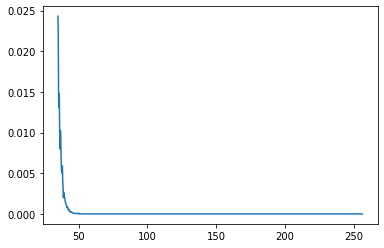

In [36]:
gamma = f[140:len(f)];#gamma frequency range
gamma_power = Pxx_den[140:];#gamma band power
plt.plot(gamma,gamma_power)
gamma_power_value = np.trapz(gamma_power,gamma);#calculating power by AUC
print(gamma_power_value)